https://www.kaggle.com/c/data-science-london-scikit-learn/overview

### Data preprocessing

In [1]:
# package which we need while importing data
import os
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set data_path
dir_data = './data/data-science-london-scikit-learn/'
train_data_path = os.path.join(dir_data, 'train.csv')
test_data_path = os.path.join(dir_data, 'test.csv')
train_label_data_path = os.path.join(dir_data, 'trainLabels.csv')

# read data from data_path
train_data = pd.read_csv(train_data_path, header=None)
test_data = pd.read_csv(test_data_path, header=None)
train_label_data = pd.read_csv(train_label_data_path, header=None)

In [3]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.299403,-1.226624,1.498425,-1.176150,5.289853,0.208297,2.404498,1.594506,-0.051608,0.663234,...,-0.850465,-0.622990,-1.833057,0.293024,3.552681,0.717611,3.305972,-2.715559,-2.682409,0.101050
1,-1.174176,0.332157,0.949919,-1.285328,2.199061,-0.151268,-0.427039,2.619246,-0.765884,-0.093780,...,-0.819750,0.012037,2.038836,0.468579,-0.517657,0.422326,0.803699,1.213219,1.382932,-1.817761
2,1.192222,-0.414371,0.067054,-2.233568,3.658881,0.089007,0.203439,-4.219054,-1.184919,-1.240310,...,-0.604501,0.750054,-3.360521,0.856988,-2.751451,-1.582735,1.672246,0.656438,-0.932473,2.987436
3,1.573270,-0.580318,-0.866332,-0.603812,3.125716,0.870321,-0.161992,4.499666,1.038741,-1.092716,...,1.022959,1.275598,-3.480110,-1.065252,2.153133,1.563539,2.767117,0.215748,0.619645,1.883397
4,-0.613071,-0.644204,1.112558,-0.032397,3.490142,-0.011935,1.443521,-4.290282,-1.761308,0.807652,...,0.513906,-1.803473,0.518579,-0.205029,-4.744566,-1.520015,1.830651,0.870772,-1.894609,0.408332


In [4]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [5]:
train_label_data.head()

,0
0,1
1,0
2,0
3,1
4,0


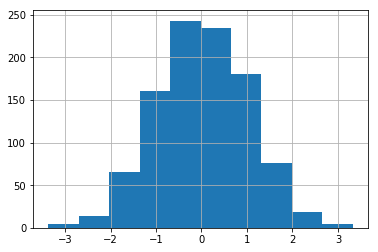

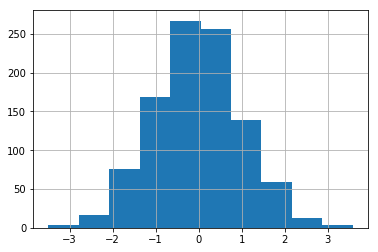

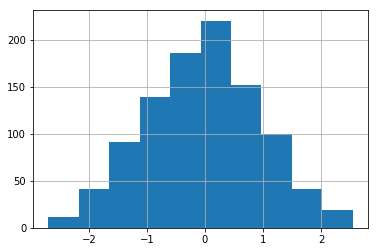

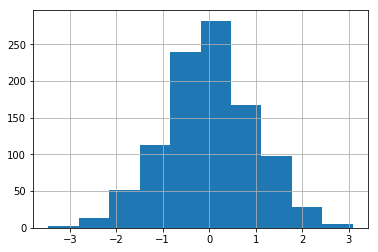

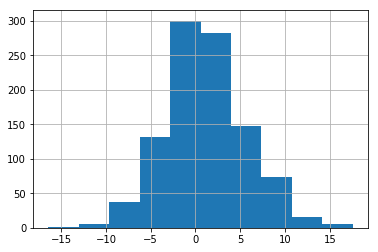

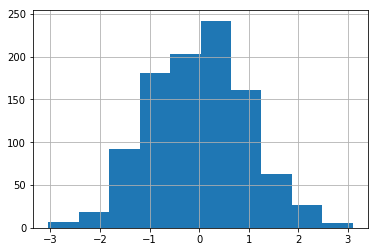

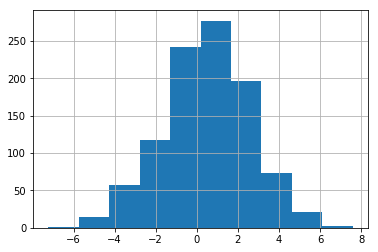

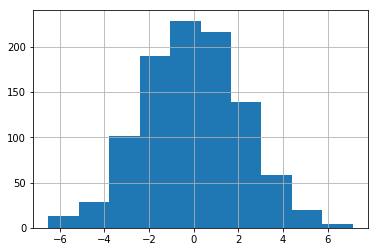

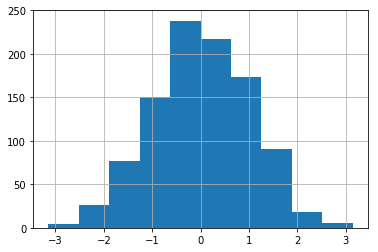

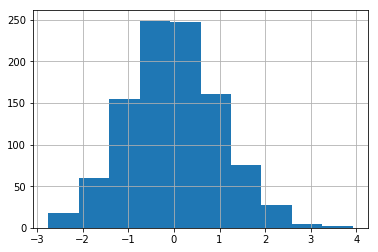

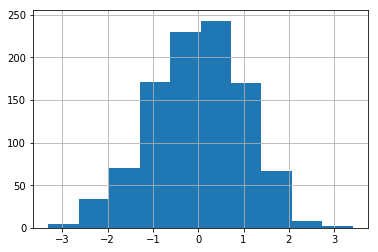

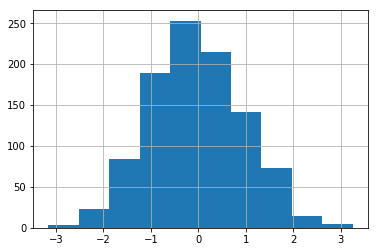

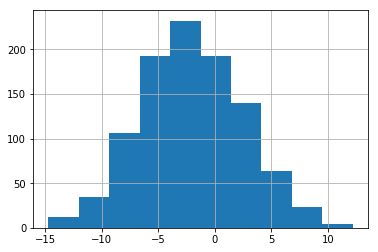

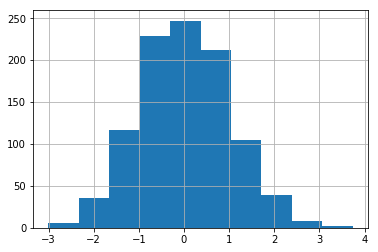

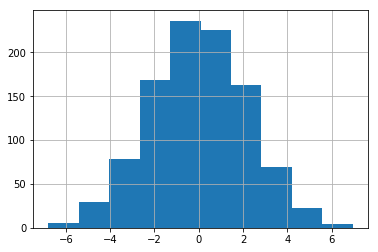

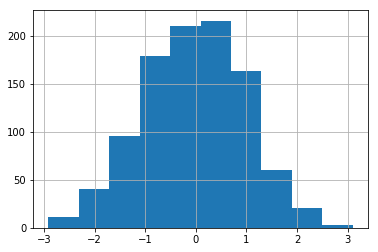

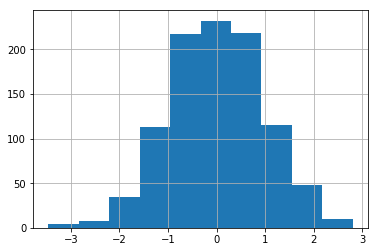

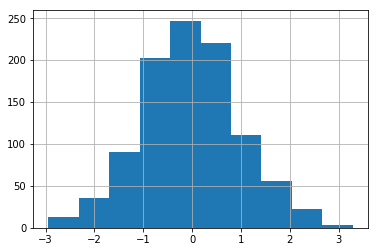

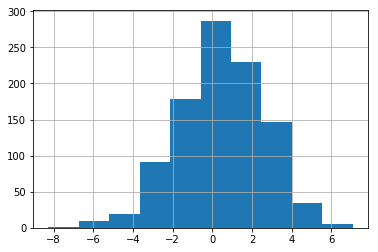

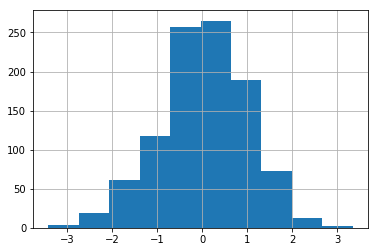

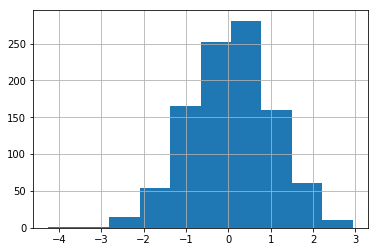

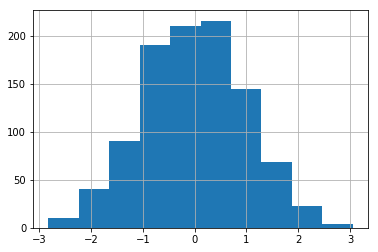

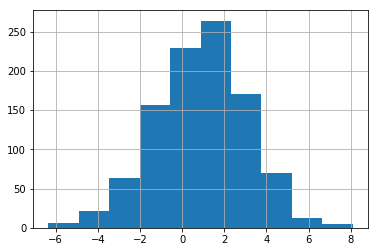

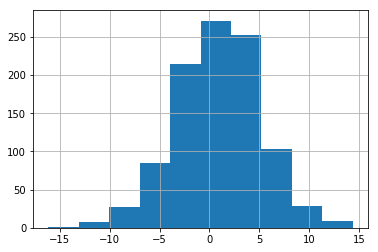

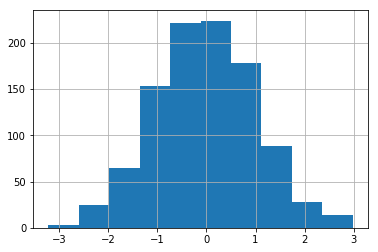

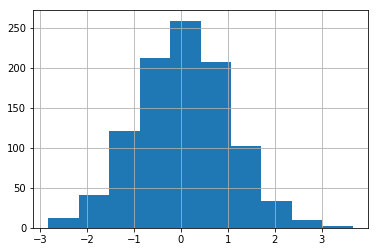

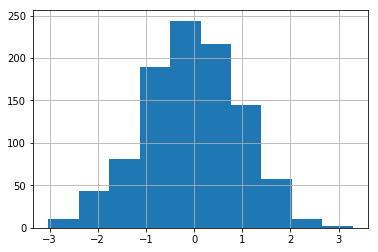

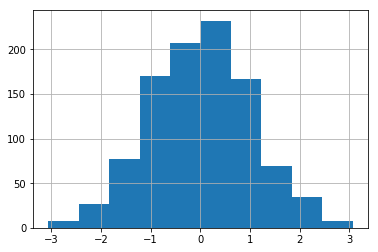

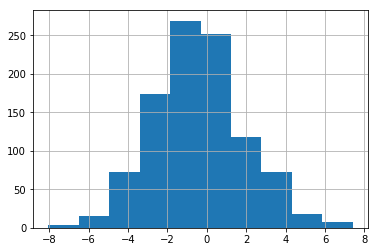

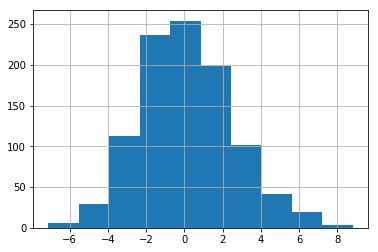

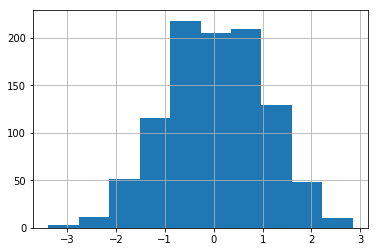

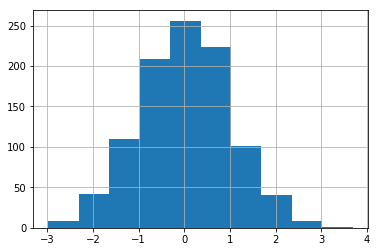

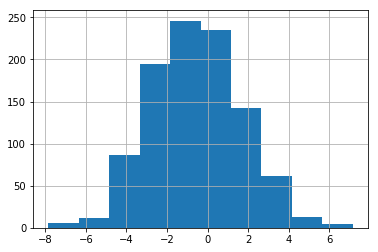

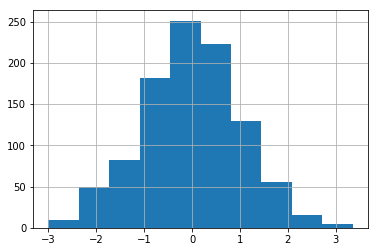

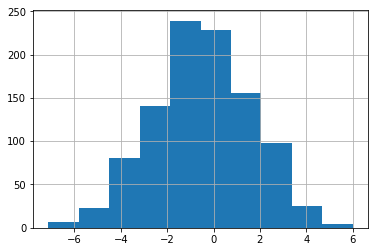

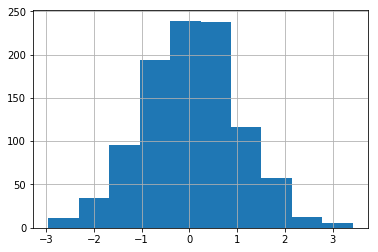

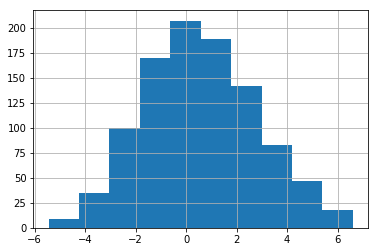

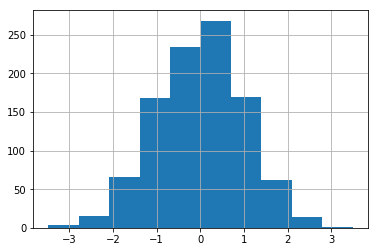

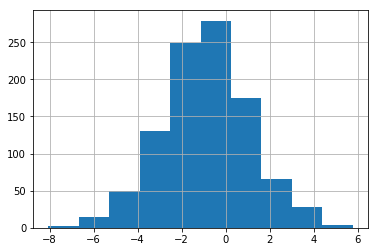

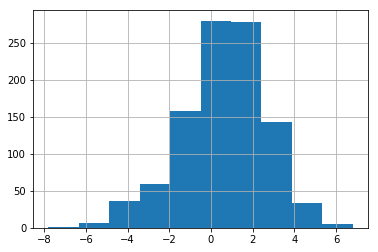

In [6]:
# to check the train_data distribution

# use histogram to visualize data
for column in train_data.columns:
    train_data[column].hist()
    plt.show()

In [7]:
# to check is there's NaN in data
for column in train_data.columns:
    if sum(train_data[column].isnull()):
        print("Column:", column, "has NaN.")

In [8]:
# since data seems to be normal distribution and I choose the RandomForest model, there's no need for Standardization.

### Fit the model

In [9]:
# package for RandomForest and the accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score
rfc = RandomForestClassifier()

# fit the model
rfc.fit(train_data , train_label_data)

score = cross_val_score(rfc , train_data , train_label_data , n_jobs = -1 , cv = 10).mean()
print("Before tunning AUC score = " ,score)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Before tunning AUC score =  0.821


### Tune the hyperparameters

In [19]:
# to tune the model with GridSearchCV
rf = RandomForestClassifier()

n_estimators = [x for x in range(10, 300)]
max_depth = [x for x in range(1, 8)]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

grid_search_rf = GridSearchCV(rf, param_grid=dict( ),scoring='accuracy',cv=10).fit(train_data , train_label_data)

print('Best Score:' , grid_search_rf.best_estimator_.score(train_data , train_label_data))

rf_best = grid_search_rf.best_estimator_

# build model
rf_best.fit(train_data, train_label_data)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

Best Score: 0.997


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predict the test_data result

In [20]:
predict = rf_best.predict(test_data)
predict

array([1, 0, 1, ..., 1, 0, 1])

### 儲存預測結果

In [21]:
submit = pd.DataFrame()
submit['Id'] = [i for i in range(1, 9001)]
submit['Solution'] = predict

submit.head(20)

,Id,Solution
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
5,6,0
6,7,0
7,8,1
8,9,0
9,10,0


In [22]:
submit.to_csv(os.path.join(dir_data, 'submit.csv'), index=False)